In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression 
from sklearn import linear_model
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv(r'C:\Users\dasso\Downloads\archive\Amazon Sale Report.csv')
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
for i in data.columns:
    print(i,':',data[i].unique(),'\n')

index : [     0      1      2 ... 128972 128973 128974] 

Order ID : ['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312'] 

Date : ['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22' '

In [11]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [14]:
data.describe(include='all')

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128975.000000,128975,128975,128975,128975,128975,128975,128975,128975,128975,...,121180,121180.000000,128942,128942,128942.000000,128942,79822,128975,39277,79925
unique,NaN,120378,91,13,2,2,2,1377,7195,9,...,1,NaN,8955,69,NaN,1,5787,2,1,1
top,NaN,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,...,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,NaN,12,2085,77804,89698,128851,88615,4224,773,50284,...,121180,NaN,11217,22260,NaN,128942,46100,128104,39277,79925
mean,64487.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,648.561465,NaN,NaN,463966.236509,NaN,NaN,NaN,NaN,NaN
std,37232.019822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,281.211687,NaN,NaN,191476.764941,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN,NaN,NaN
25%,32243.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,449.000000,NaN,NaN,382421.000000,NaN,NaN,NaN,NaN,NaN
50%,64487.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,605.000000,NaN,NaN,500033.000000,NaN,NaN,NaN,NaN,NaN
75%,96730.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,788.000000,NaN,NaN,600024.000000,NaN,NaN,NaN,NaN,NaN


In [15]:
null_columns = data.columns[data.isnull().any()]
print('Columns contain null values : ')
print()
for col in null_columns:
    print(col)

Columns contain null values : 

Courier Status
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
promotion-ids
fulfilled-by
Unnamed: 22


In [16]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

In [17]:
data.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

<Axes: >

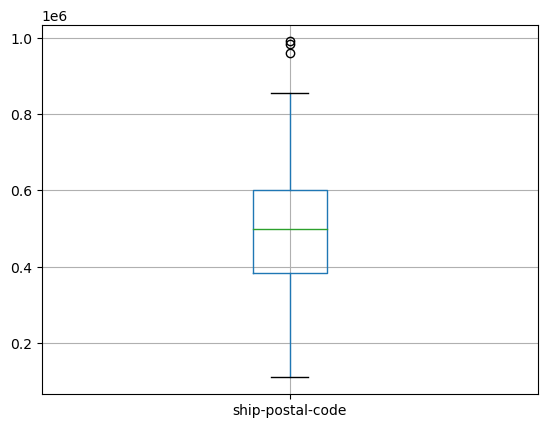

In [18]:
data[['ship-postal-code']].boxplot()

<Axes: >

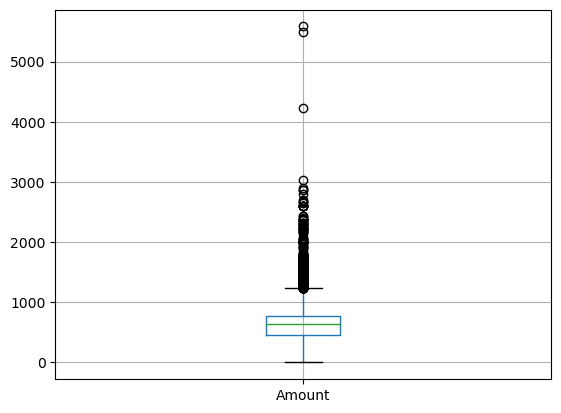

In [19]:
data[['Amount']].boxplot()

In [20]:
List=['Amount','ship-postal-code']

for col in List:
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    
    # Calculate IQR
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = data[data[col] >= lower_bound]
    filtered_data = filtered_data[filtered_data[col] <= upper_bound]

    data = filtered_data.copy() 

<Axes: >

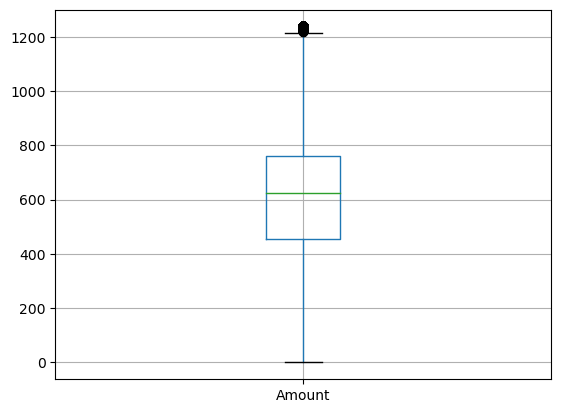

In [21]:
data[['Amount']].boxplot()


<Axes: >

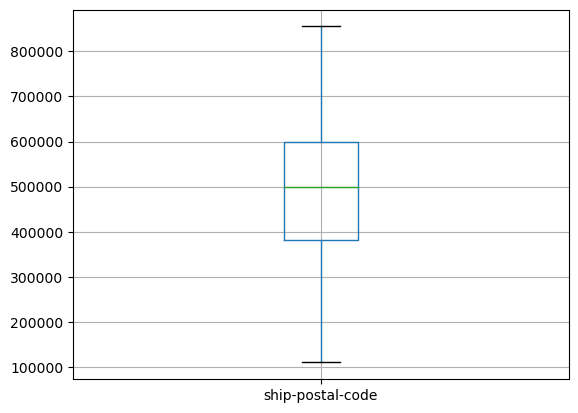

In [22]:
data[['ship-postal-code']].boxplot()

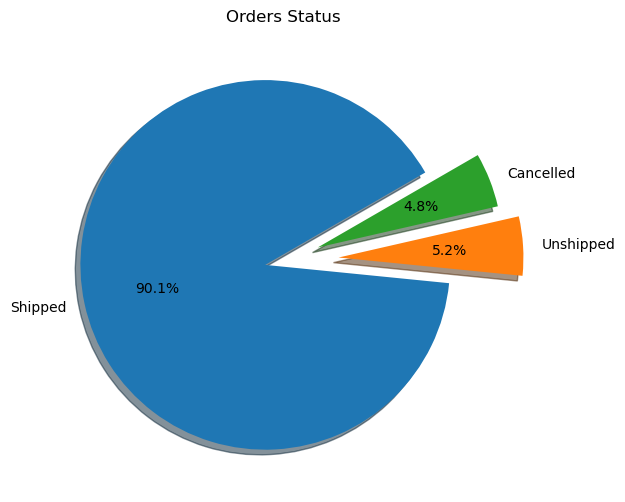

In [23]:
Status_count = data['Courier Status'].value_counts()


plt.figure(figsize=(6,6))
plt.pie(Status_count, labels=Status_count.index, autopct='%1.1f%%', 
        startangle=30,explode=(0.1,0.3,0.2),shadow=True)

plt.title('Orders Status')
plt.show()

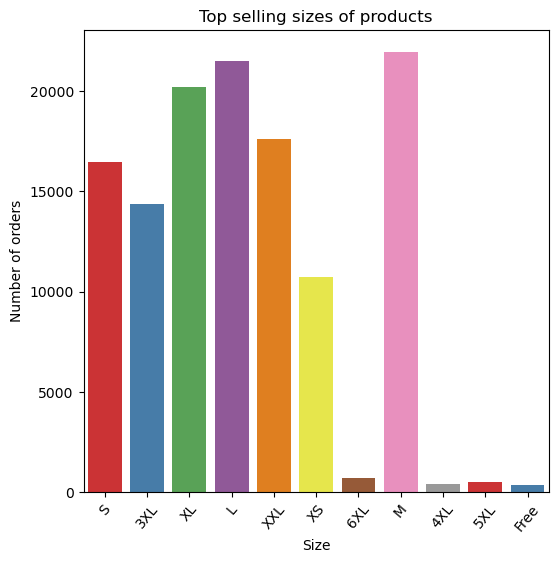

In [24]:
plt.figure(figsize=(6, 6))
sns.countplot(x=data['Size'],data=data,palette='Set1')

plt.xlabel('Size')
plt.ylabel('Number of orders')
plt.title('Top selling sizes of products')
plt.xticks(rotation=50)

plt.show()

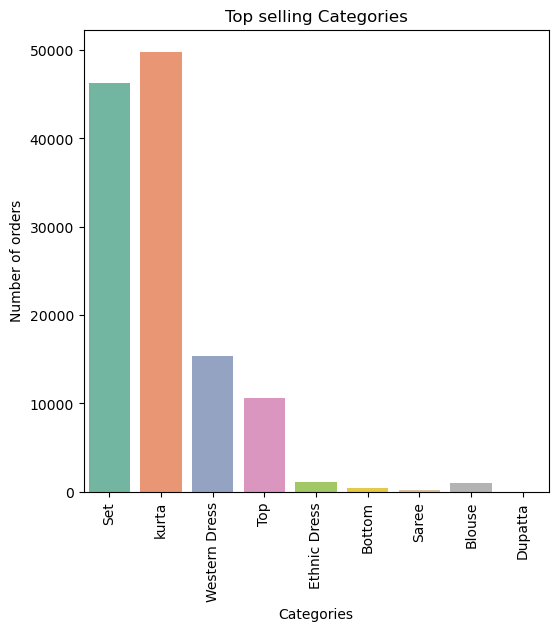

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(x=data['Category'],data=data,palette='Set2')

plt.xlabel('Categories')
plt.ylabel('Number of orders')
plt.title('Top selling Categories')
plt.xticks(rotation=90)

plt.show()


In [27]:
data['Date']=pd.to_datetime(data['Date'])

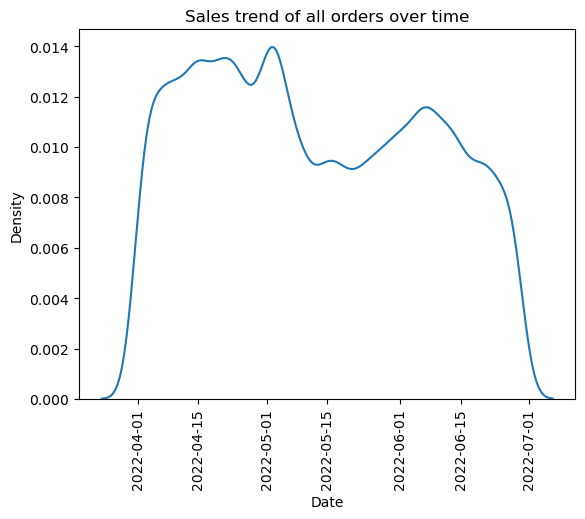

In [28]:
sns.kdeplot(data=data,x="Date")
plt.xticks(rotation=90)
plt.title('Sales trend of all orders over time')
plt.show()

In [29]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [30]:
data1 = data.copy()

In [31]:
B2B_map = { False : 0 , True : 1 }
category_map = {'Shipped': 1, 'Unshipped': 0 , 'Cancelled' : -1}
Fulfilment_map = { 'Amazon' : 1 ,'Merchant' : 0 }
ship_service_level_map = { 'Expedited' : 1 , 'Standard' : 0}




data1['Courier Status'] = data['Courier Status'].map(category_map)
data1['B2B']=data['B2B'].map(B2B_map)
data1['Fulfilment']=data['Fulfilment'].map(Fulfilment_map)
data1['ship-service-level']=data['ship-service-level'].map(ship_service_level_map)

In [32]:
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['index',
 'Fulfilment',
 'ship-service-level',
 'Courier Status',
 'Qty',
 'Amount',
 'ship-postal-code',
 'B2B']

In [34]:
cols=['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B']

X = data1[cols] 
Y = data1['Courier Status'] 
 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=45)

model = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1)

model.fit(X_train, y_train)
#testing the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(X_test.head(4))
print('_'*50)
print("Mean Squared Error (MSE):", mse)

        Fulfilment  ship-service-level  Qty  Amount  ship-postal-code  B2B
88317            1                   1    1   597.0          400708.0    0
96199            1                   1    1   999.0          574239.0    0
119996           0                   0    1   735.0          577101.0    0
103016           1                   1    1  1125.0          560043.0    0
__________________________________________________
Mean Squared Error (MSE): 0.24035418085660484


In [35]:
# Perform K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=45)  

scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:")
print(scores)
print('_'*30)
print(f"Mean Cross-Validation Accuracy: {scores.mean():.2f}")

Cross-Validation Accuracy Scores:
[0.90316118 0.8995152  0.90079731 0.90147842 0.89943507]
______________________________
Mean Cross-Validation Accuracy: 0.90


In [36]:
# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy :.2f}")
print('_'*30)
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.90
______________________________
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1194
           0       0.00      0.00      0.00      1223
           1       0.90      1.00      0.95     22542

    accuracy                           0.90     24959
   macro avg       0.30      0.33      0.32     24959
weighted avg       0.82      0.90      0.86     24959



In [38]:
cols=['Fulfilment','ship-service-level','Qty','Amount','ship-postal-code','B2B']

Y = data1['Courier Status'] 
X = data1[cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, Y)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"RF Model Accuracy: {accuracy:.2f}")
print('_'*30)

RF Model Accuracy: 0.95
______________________________
